In [1]:
import numpy as np
import xarray as xr
import scipy.signal as sg
import matplotlib.pyplot as plt
from matplotlib import patches
import npc_lims
from npc_sessions import DynamicRoutingSession, get_sessions
from dynamic_routing_analysis import spike_utils
import os

%matplotlib widget


In [2]:
tracked_sessions: tuple[npc_lims.SessionInfo, ...] = npc_lims.get_session_info()
tracked_sessions[0]

SessionInfo(id='708016_2024-02-02', project='DynamicRouting', is_ephys=False, is_sync=False, allen_path=WindowsUPath('//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/Data/708016'), experiment_day=None, session_kwargs={}, notes='', issues=[])

In [3]:
session = DynamicRoutingSession('668755_2023-08-30')
# session = DynamicRoutingSession('662892_2023-08-22')

In [4]:
session.electrodes[:]

,location,group,group_name,structure,x,y,z,channel,rel_x,rel_y,reference,imp
id,,,,,,,,,,,,
0,PIR,probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,probeA,PIR,4775.0,5850.0,2950.0,0,27,0,tip,150000.0
1,PIR,probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,probeA,PIR,4775.0,5850.0,2950.0,1,59,0,tip,150000.0
2,PIR,probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,probeA,PIR,4775.0,5850.0,2950.0,2,11,20,tip,150000.0
3,OLF,probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,probeA,OLF,4750.0,5800.0,2950.0,3,43,20,tip,150000.0
4,OLF,probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,probeA,OLF,4750.0,5800.0,2950.0,4,27,40,tip,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,root,probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,probeF,root,6550.0,800.0,1875.0,379,43,3780,tip,150000.0
2300,root,probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,probeF,root,6550.0,800.0,1875.0,380,27,3800,tip,150000.0
2301,root,probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,probeF,root,6525.0,750.0,1875.0,381,59,3800,tip,150000.0


In [5]:
session.units[:]

fetching units: 100%|█████████████████████████| 6/6 [03:49<00:00, 38.24s/device]
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,...,ccf_ml,structure,location,peak_electrode,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,954.0,0.146856,1.000000,5.591521,0.000000,0.0,0.000000,0.0,NaN,0.000271,...,2950.0,PIR,PIR,0,"[21.61879711297091, 29.686046002302277, 38.586...","[(20.230733505100684, 6516.361218353632)]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[-0.55692, 0.43992013, -0.12635998, 0.3650399...","[[14.995247, 13.266918, 15.113407, 12.976279, ..."
1,6596.0,1.015371,1.000000,7.105075,0.000000,0.0,0.000000,0.0,0.070,0.000998,...,2950.0,PIR,PIR,0,"[21.299764482671552, 21.302864475840273, 22.38...","[(20.230733505100684, 6516.361218353632)]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[-0.8423999, -0.12635997, -0.9126001, -0.2527...","[[11.708981, 11.195639, 12.191796, 11.015494, ..."
2,2147.0,0.330504,1.000000,5.657172,0.000000,0.0,0.000000,0.0,NaN,0.001187,...,2950.0,PIR,PIR,1,"[20.457566338575468, 22.166962571676684, 34.35...","[(20.230733505100684, 6516.361218353632)]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[-0.46800017, -0.5428798, -1.0530001, -0.9219...","[[11.66062, 11.157201, 12.212804, 10.871, 10.2..."
3,10918.0,1.680689,1.000000,6.536701,0.181655,10.0,0.147054,5.0,0.145,0.005295,...,2950.0,PIR,PIR,2,"[20.640265935970806, 20.67126586765803, 20.713...","[(20.230733505100684, 6516.361218353632)]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[-1.3525196, -0.59436023, -0.5896799, 0.29952...","[[14.361551, 11.994289, 11.8517, 10.475157, 10..."
4,18109.0,2.787653,1.000000,11.272967,0.343359,52.0,0.411530,33.0,0.315,0.000093,...,2950.0,PIR,PIR,2,"[20.5893327148761, 20.719265761883406, 20.7325...","[(20.230733505100684, 6516.361218353632)]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",probeA pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[-1.0670403, -0.59904003, -0.5756398, -0.0795...","[[13.773846, 11.716479, 12.783659, 10.398884, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,2598.0,0.399931,0.888889,11.725784,0.000000,0.0,0.000000,0.0,0.225,0.001840,...,2425.0,SSp,SSp-bfd6a,2110,"[127.44290420981146, 127.55970391313585, 127.6...","[(20.267243106661656, 6516.363276113362)]","[2102, 2103, 2104, 2105, 2106, 2107, 2108, 210...",probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[0.47736022, 0.7019999, 0.023399973, 0.617759...","[[13.396243, 15.094358, 12.931098, 13.48504, 1..."
2066,12889.0,1.984110,1.000000,6.804698,0.130345,10.0,0.103070,5.0,0.160,0.000041,...,2350.0,SSp,SSp-bfd6a,2129,"[21.027074509994836, 27.738390796334052, 29.62...","[(20.267243106661656, 6516.363276113362)]","[2120, 2121, 2122, 2123, 2124, 2125, 2126, 212...",probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[0.82367975, 0.9734399, 0.5943604, 0.3556798,...","[[12.253221, 13.2632675, 12.295461, 17.325624,..."
2067,9941.0,1.530300,1.000000,6.738152,0.109558,5.0,0.068050,2.0,0.130,0.000026,...,2350.0,SSp,SSp-bfd6a,2141,"[23.56586806136436, 25.987795242912163, 26.357...","[(20.267243106661656, 6516.363276113362)]","[2132, 2133, 2134, 2135, 2136, 2137, 2138, 213...",probeF pynwb.ecephys.ElectrodeGroup at 0x24107...,"[[1.2963604, 0.023399925, 1.3337998, -0.393120...","[[17.28356, 12.029033, 13.101715, 12.397975, 1..."


In [ ]:
# session.electrodes[:].to_csv(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\testing_electode_locations\electrodes.csv")
# session.units[:].to_csv(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\testing_electode_locations\units.csv")

In [6]:
session.id

'668755_2023-08-30'

In [7]:
if 'structure' in session.electrodes[:].columns:
    print(session.electrodes[:]['structure'].unique())
else:
    print('no structure column found in electrodes table')

['PIR' 'OLF' 'CTXsp' 'EPd' 'CP' 'ec' 'AId' 'GU' 'MOp' 'root' 'ORBl'
 'ORBvl' 'FRP' 'MOs' 'out of brain' 'TTd' 'fa' 'ccg' 'ACAv' 'ACAd' 'NPC'
 'MB' 'SCzo' 'SCop' 'SCsg' 'RSPv' 'RSPd' 'RSPagl' 'MPT' 'PPT' 'NOT' 'HPF'
 'fp' 'dhc' 'cing' 'VISam' 'LGv' 'fiber tracts' 'fi' 'alv' 'VL' 'ccs' 'or'
 'SSp']


In [8]:
session.units[:].query('default_qc')['structure'].value_counts()

structure
MOs      311
MOp      306
ACAv     242
VISam    160
RSPv     147
SSp      126
ACAd     113
ccg       82
GU        73
ORBl      68
ec        50
root      39
MB        33
ORBvl     32
SCsg      31
EPd       29
MPT       29
NPC       28
RSPd      26
FRP       21
TTd       18
LGv       18
OLF       16
PIR       14
AId       11
CP        10
HPF        9
NOT        6
cing       5
PPT        4
ccs        3
SCzo       2
fp         2
dhc        2
fa         2
CTXsp      1
or         1
Name: count, dtype: int64

In [9]:
session.units[:].columns

Index(['num_spikes', 'firing_rate', 'presence_ratio', 'snr',
       'isi_violations_ratio', 'isi_violations_count', 'rp_contamination',
       'rp_violations', 'sliding_rp_violation', 'amplitude_cutoff',
       'drift_ptp', 'drift_std', 'drift_mad', 'isolation_distance', 'l_ratio',
       'd_prime', 'peak_to_valley', 'peak_trough_ratio', 'half_width',
       'repolarization_slope', 'recovery_slope', 'electrode_group_name',
       'peak_channel', 'cluster_id', 'default_qc', 'amplitude', 'channels',
       'unit_id', 'group_name', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'structure',
       'location', 'peak_electrode', 'spike_times', 'obs_intervals',
       'electrodes', 'electrode_group', 'waveform_mean', 'waveform_sd'],
      dtype='object')

In [10]:
session.units[:]['peak_to_valley']

id
0       0.000570
1       0.000490
2       0.000400
3       0.000670
4       0.000417
          ...   
2065    0.000800
2066    0.000600
2067    0.000340
2068    0.000547
2069    0.000407
Name: peak_to_valley, Length: 2070, dtype: float64

In [11]:
session.trials[:].columns

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
aligning sound waveforms: 100%|████████████| 513/513 [01:24<00:00,  6.09trial/s]


Index(['start_time', 'stop_time', 'quiescent_start_time',
       'quiescent_stop_time', 'stim_start_time', 'stim_stop_time',
       'response_window_start_time', 'response_window_stop_time',
       'task_control_response_time', 'response_time', 'reward_time',
       'post_response_window_start_time', 'post_response_window_stop_time',
       'stim_name', 'block_index', 'context_name', 'trial_index',
       'trial_index_in_block', 'repeat_index', 'is_response', 'is_correct',
       'is_incorrect', 'is_hit', 'is_false_alarm', 'is_correct_reject',
       'is_miss', 'is_go', 'is_nogo', 'is_rewarded', 'is_noncontingent_reward',
       'is_contingent_reward', 'is_reward_scheduled', 'is_aud_stim',
       'is_vis_stim', 'is_catch', 'is_target', 'is_aud_target',
       'is_vis_target', 'is_nontarget', 'is_aud_nontarget', 'is_vis_nontarget',
       'is_vis_context', 'is_aud_context', 'is_context_switch', 'is_repeat',
       'is_opto'],
      dtype='object')

In [33]:
#make trial aligned 3d spike tensor
time_before = 0.5
time_after = 1.0
binsize = 0.01
trial_da = spike_utils.make_neuron_time_trials_tensor(session.units, session.trials, time_before, time_after, binsize)

In [13]:
trial_da.shape

(2070, 1499, 513)

In [14]:
session.trials[:]['is_response']

id
0       True
1       True
2       True
3       True
4       True
       ...  
508     True
509     True
510     True
511    False
512    False
Name: is_response, Length: 513, dtype: bool

In [34]:
#calculate aud vs. vis context differences

vis_context_fr = trial_da.sel(trials=session.trials[:].query('is_vis_context').index,
                              time=slice(-0.2,0)).mean(dim=['trials','time'])

aud_context_fr = trial_da.sel(trials=session.trials[:].query('is_aud_context').index,
                              time=slice(-0.2,0)).mean(dim=['trials','time'])

vis_vs_aud_diff = vis_context_fr - aud_context_fr


In [35]:
session.trials[:].columns

Index(['start_time', 'stop_time', 'quiescent_start_time',
       'quiescent_stop_time', 'stim_start_time', 'stim_stop_time',
       'response_window_start_time', 'response_window_stop_time',
       'task_control_response_time', 'response_time', 'reward_time',
       'post_response_window_start_time', 'post_response_window_stop_time',
       'stim_name', 'block_index', 'context_name', 'trial_index',
       'trial_index_in_block', 'repeat_index', 'is_response', 'is_correct',
       'is_incorrect', 'is_hit', 'is_false_alarm', 'is_correct_reject',
       'is_miss', 'is_go', 'is_nogo', 'is_rewarded', 'is_noncontingent_reward',
       'is_contingent_reward', 'is_reward_scheduled', 'is_aud_stim',
       'is_vis_stim', 'is_catch', 'is_target', 'is_aud_target',
       'is_vis_target', 'is_nontarget', 'is_aud_nontarget', 'is_vis_nontarget',
       'is_vis_context', 'is_aud_context', 'is_context_switch', 'is_repeat',
       'is_opto'],
      dtype='object')

In [36]:
session.trials[:]['stim_name'].unique()

array(['sound1', 'vis2', 'vis1', 'sound2', 'catch'], dtype=object)

In [52]:
session.units[:].columns

Index(['num_spikes', 'firing_rate', 'presence_ratio', 'snr',
       'isi_violations_ratio', 'isi_violations_count', 'rp_contamination',
       'rp_violations', 'sliding_rp_violation', 'amplitude_cutoff',
       'drift_ptp', 'drift_std', 'drift_mad', 'isolation_distance', 'l_ratio',
       'd_prime', 'peak_to_valley', 'peak_trough_ratio', 'half_width',
       'repolarization_slope', 'recovery_slope', 'electrode_group_name',
       'peak_channel', 'cluster_id', 'default_qc', 'amplitude', 'channels',
       'unit_id', 'group_name', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'structure',
       'location', 'peak_electrode', 'spike_times', 'obs_intervals',
       'electrodes', 'electrode_group', 'waveform_mean', 'waveform_sd'],
      dtype='object')

<Axes: ylabel='Frequency'>

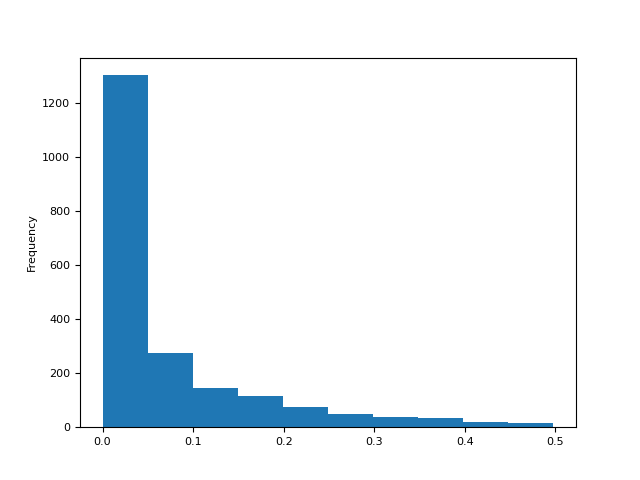

In [56]:
fig, ax = plt.subplots()
session.units[:]['isi_violations_ratio'].plot.hist()

In [60]:
# np.mean(session.units[:]['presence_ratio']>=0.99)
# np.mean(session.units[:]['isi_violations_ratio']<=0.1)
np.mean((session.units[:]['isi_violations_ratio']<=0.1)&
        (session.units[:]['presence_ratio']>=0.99))

0.5705314009661836

Text(0, 0.5, 'unit count')

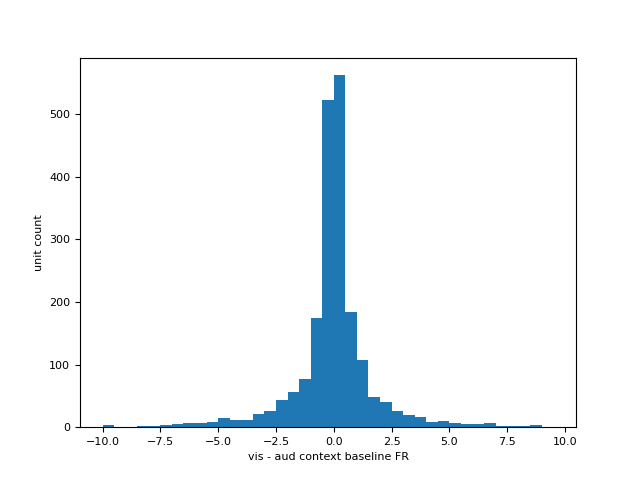

In [37]:
fig,ax=plt.subplots(1,1)
ax.hist(vis_vs_aud_diff, bins=np.arange(-10,10,0.5))
ax.set_xlabel('vis - aud context baseline FR')
ax.set_ylabel('unit count')

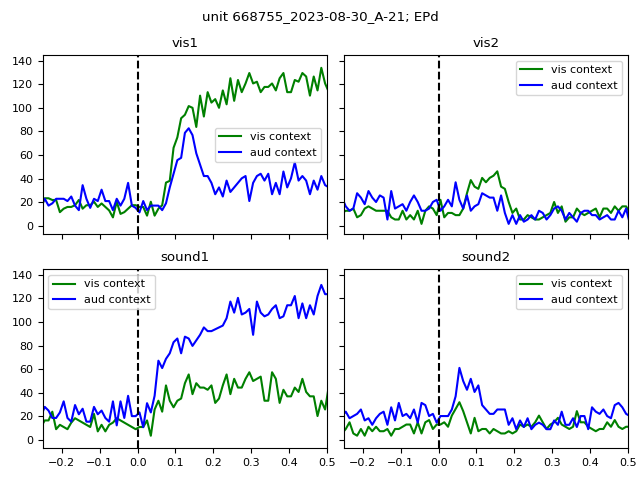

In [40]:
##plot example units with context differences -- subplot for each stimulus

sel_unit_idx=np.random.permutation(np.where(np.abs(vis_vs_aud_diff)>5)[0])[0]
# sel_unit_idx=session.units[:].query('structure.str.contains("ORB") and firing_rate>=5').index.values[5]
# sel_unit_idx=session.units[:].query('structure.str.contains("AI") and firing_rate>=4').index.values[0]

sel_unit=session.units[:]['unit_id'][sel_unit_idx]

fig,ax=plt.subplots(2,2,sharex=True,sharey=True)

ax=ax.flatten()

stims=['vis1','vis2','sound1','sound2']

for st,stim in enumerate(stims):

    stim_trials=session.trials[:].query('stim_name==@stim')

    vis_context_spikes=trial_da.sel(
        trials=stim_trials.query('is_vis_context').index,
        unit_id=sel_unit,).mean(dim=['trials'])

    aud_context_spikes=trial_da.sel(
        trials=stim_trials.query('is_aud_context').index,
        unit_id=sel_unit,).mean(dim=['trials'])

    ax[st].plot(vis_context_spikes.time, vis_context_spikes.values, label='vis context',color='g')
    ax[st].plot(aud_context_spikes.time, aud_context_spikes.values, label='aud context',color='b')
    ax[st].axvline(0, color='k', linestyle='--')
    ax[st].set_title(stim)
    ax[st].legend()
    ax[st].set_xlim([-0.25,0.5])

fig.suptitle('unit '+session.units[:].iloc[sel_unit_idx]['unit_id']+'; '+session.units[:].iloc[sel_unit_idx]['structure'])

fig.tight_layout()

In [ ]:
sel_unit

In [ ]:
session.units[:]['unit_id']

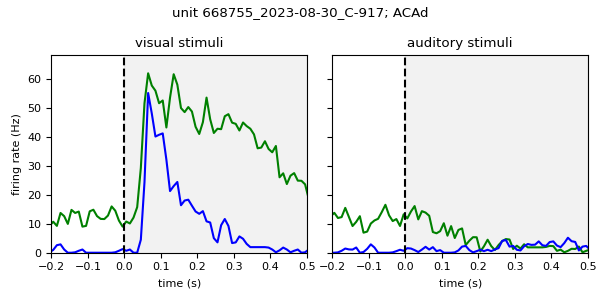

In [61]:

# sel_unit=np.random.permutation(np.where(np.abs(vis_vs_aud_diff)>3)[0])[0]

# sel_unit_idx=np.where((np.abs(vis_vs_aud_diff)>3)&(session.units[:]['structure'].str.contains("ACAd").values))[0][1]

session_id_str=str(session.id)

sel_unit_idx=session.units[:].query('unit_id == "668755_2023-08-30_C-917"').index.values[0]

# sel_unit_idx=session.units[:].query('structure.str.contains("VIS") and firing_rate>=5').index.values[0]

sel_unit=session.units[:]['unit_id'][sel_unit_idx]

# gwindow = sg.windows.gaussian(25, std=10)
gwindow = sg.windows.gaussian(5, std=1)
gwindow[3:]=0
# gwindow=np.ones(10)

fig,ax=plt.subplots(1,2,sharex=True,sharey=True,figsize=(6,3))

stims=['vis1','sound1']

rmax=[]

for st,stim in enumerate(stims):

    stim_trials=session.trials[:].query('stim_name==@stim')

    vis_context_spikes=trial_da.sel(
        trials=stim_trials.query('is_vis_context').index,
        unit_id=sel_unit,).mean(dim=['trials'])

    aud_context_spikes=trial_da.sel(
        trials=stim_trials.query('is_aud_context').index,
        unit_id=sel_unit,).mean(dim=['trials'])

    vis_spikes_smooth=sg.convolve(vis_context_spikes.values,gwindow,mode='same')/np.sum(gwindow)
    aud_spikes_smooth=sg.convolve(aud_context_spikes.values,gwindow,mode='same')/np.sum(gwindow)

    stim_rect=patches.Rectangle([0,-22],0.5,200,color='grey',alpha=0.1)
    ax[st].add_patch(stim_rect)
    ax[st].plot(vis_context_spikes.time, vis_spikes_smooth, label='vis context',color='g')
    ax[st].plot(aud_context_spikes.time, aud_spikes_smooth, label='aud context',color='b')
    ax[st].axvline(0, color='k', linestyle='--')
    # ax[st].set_title(stim)
    # ax[st].legend()
    ax[st].set_xlim(-0.2,0.5)
    ax[st].set_xlabel('time (s)')

    rmax.append(np.max([np.max(vis_spikes_smooth),np.max(aud_spikes_smooth)]))
    if st==0:
        ax[st].set_ylabel('firing rate (Hz)')
        ax[st].set_title('visual stimuli')
    elif st==1:
            ax[st].set_title('auditory stimuli')
ax[st].set_ylim(0,np.max(rmax)*1.1)
fig.suptitle('unit '+session.units[:].iloc[sel_unit_idx]['unit_id']+'; '+session.units[:].iloc[sel_unit_idx]['structure'])

fig.tight_layout()

In [45]:
gwindow

array([0.13533528, 0.60653066, 1.        , 0.        , 0.        ])

In [ ]:
vis_context_spikes.values

In [ ]:

# figpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-10-26-example_units_for_DR_poster'
# figname='unit_'+session.units[:].iloc[sel_unit]['unit_id']+'_'+session.units[:].iloc[sel_unit]['structure']+'_10ms_smoothing.pdf'
# # figname='control_heatmap_500ms_all.png'
# fig.savefig(os.path.join(figpath,figname), dpi=300, facecolor='w', edgecolor='w',
#             orientation='portrait', format='pdf',
#             transparent=True, bbox_inches='tight', pad_inches=0.1,
#             metadata=None)

In [21]:
session.units[:]['structure'].unique()

array(['PIR', 'CTXsp', 'OLF', 'EPd', 'CP', 'ec', 'AId', 'GU', 'MOp',
       'ORBl', 'ORBvl', 'FRP', 'MOs', 'TTd', 'fa', 'ccg', 'ACAv', 'ACAd',
       'root', 'NPC', 'MB', 'SCzo', 'SCsg', 'RSPv', 'RSPd', 'MPT', 'PPT',
       'NOT', 'HPF', 'fp', 'dhc', 'cing', 'VISam', 'LGv', 'ccs', 'SSp',
       'or'], dtype=object)

In [ ]:
session.units[:].columns

In [22]:
sorted_units=session.units[:].sort_values(by='electrodes')

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(np.hstack(sorted_units[:]['electrodes'].values))

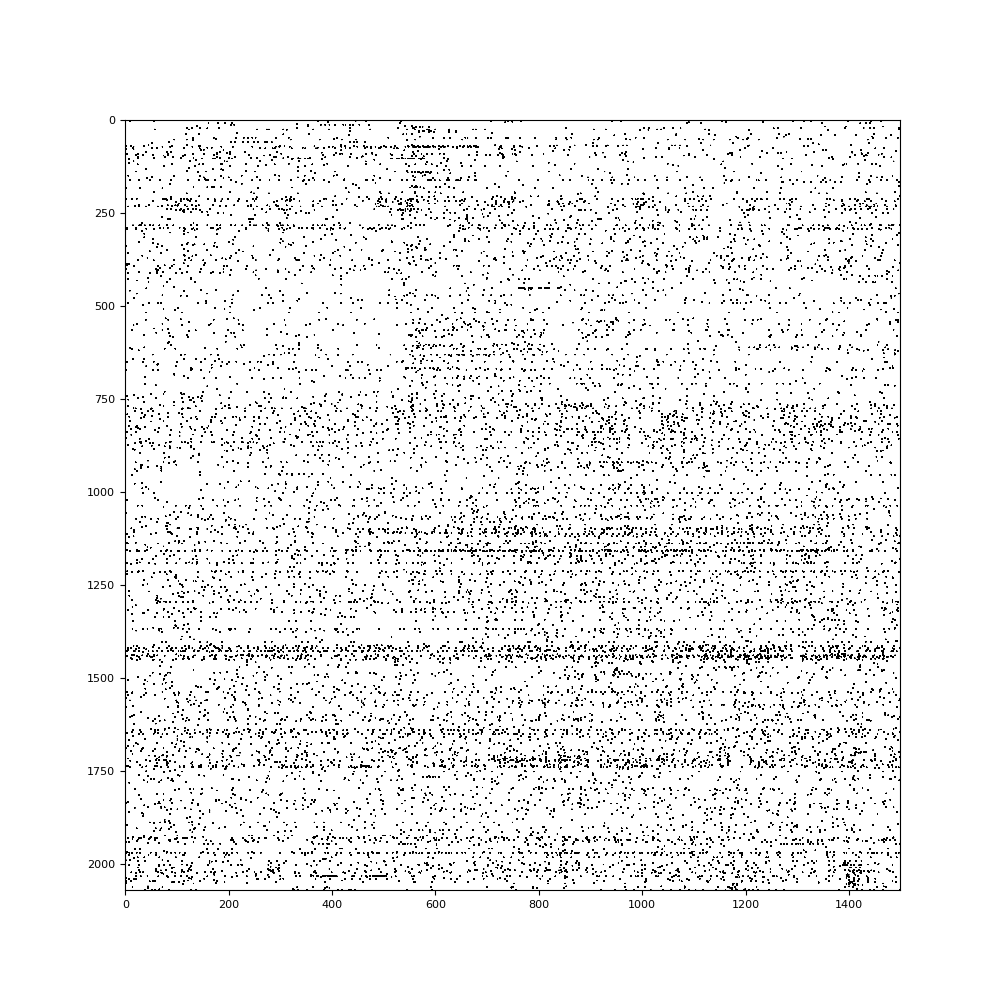

In [24]:
trialnum=10

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(trial_da.sel(trials=trialnum,unit_id=sorted_units[:]['unit_id'].values).values,aspect='auto',cmap='Greys',vmin=0,vmax=1)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_6124\1383096079.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1)


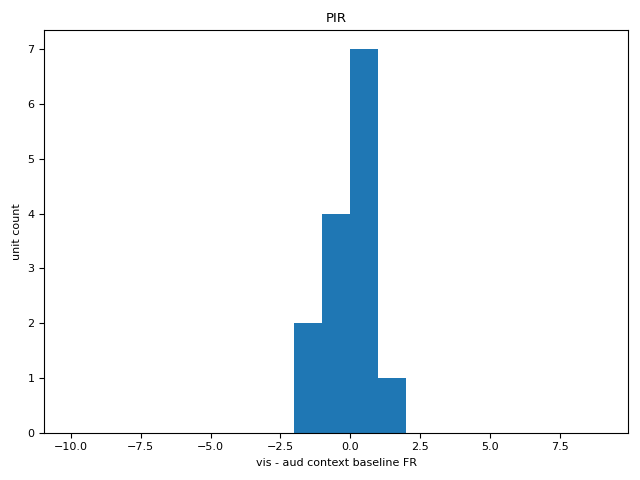

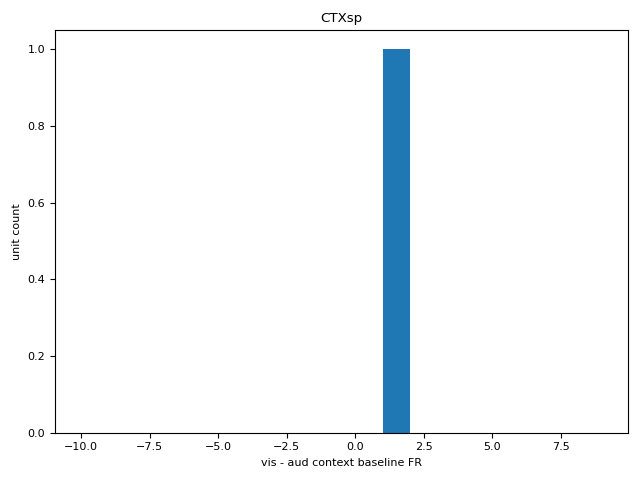

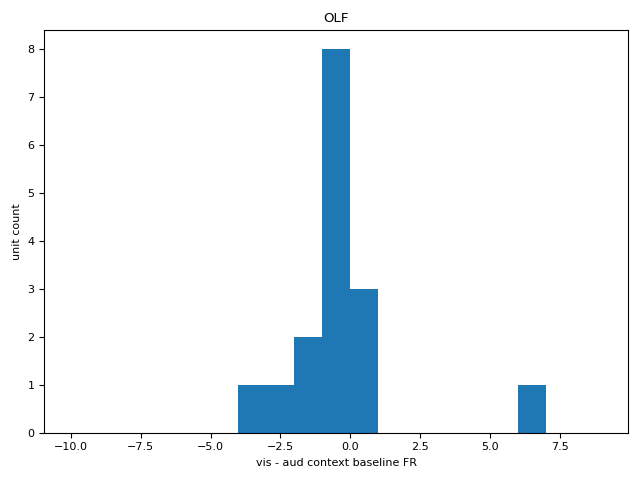

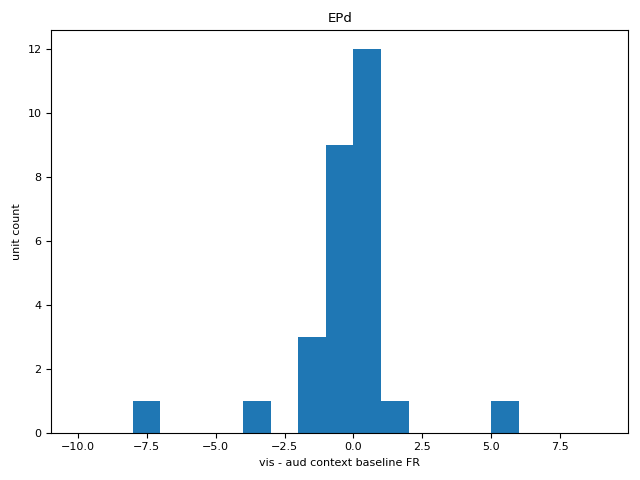

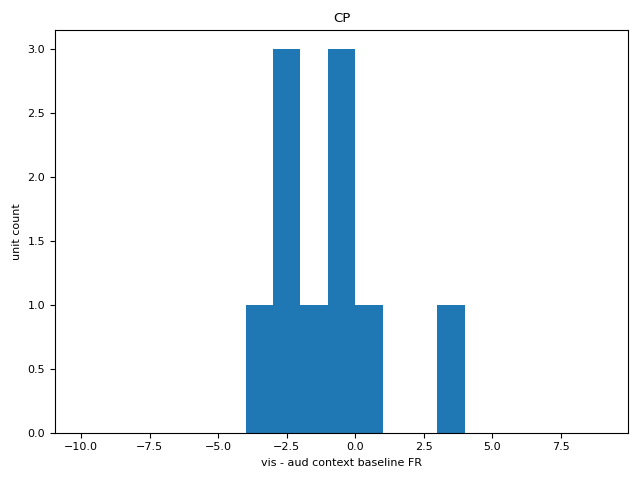

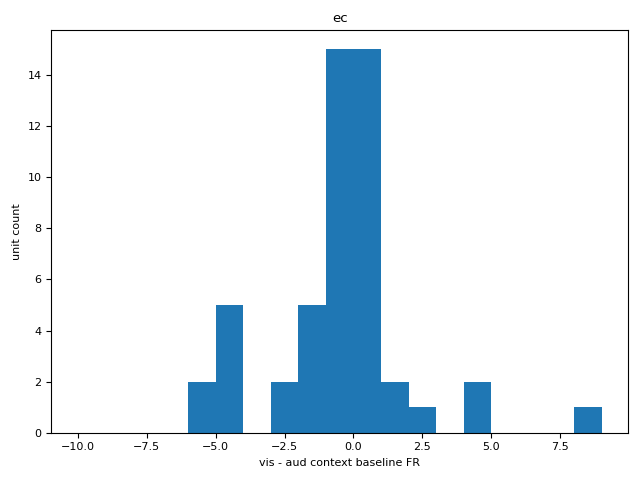

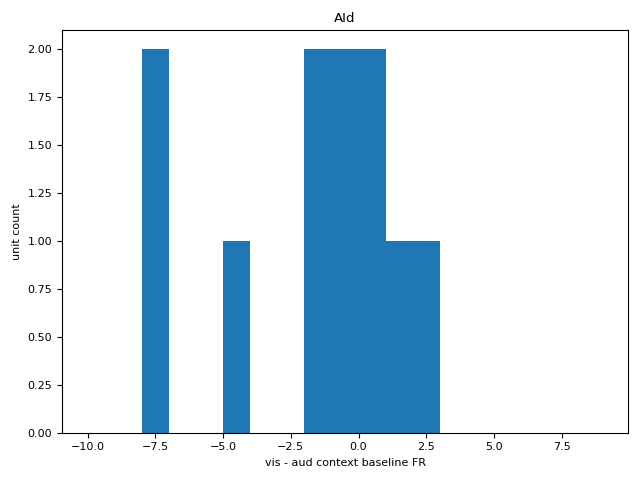

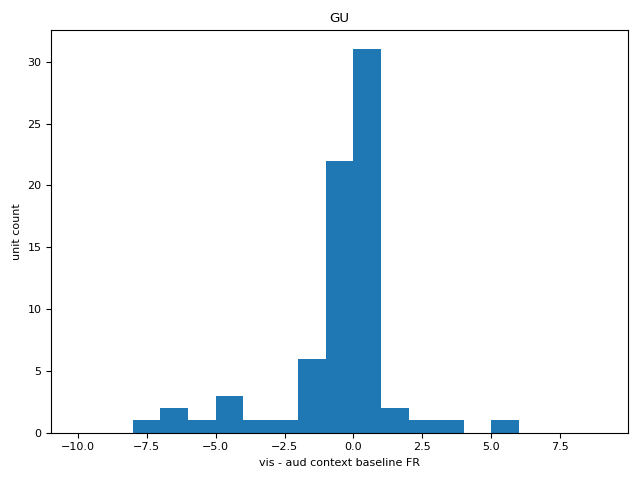

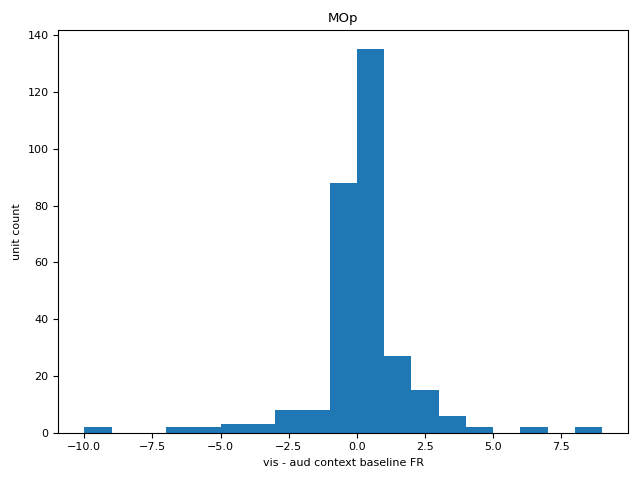

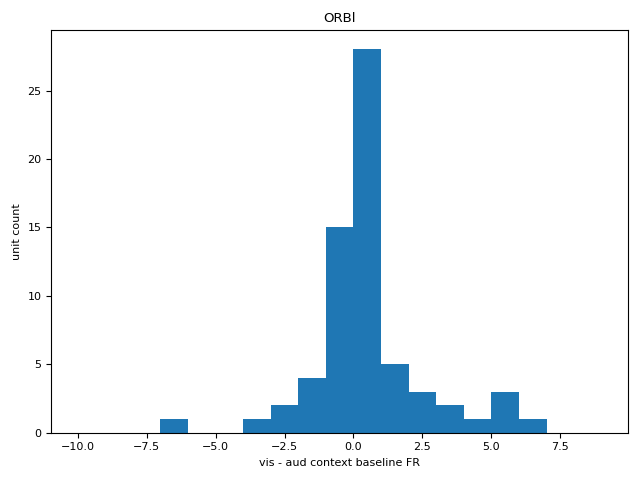

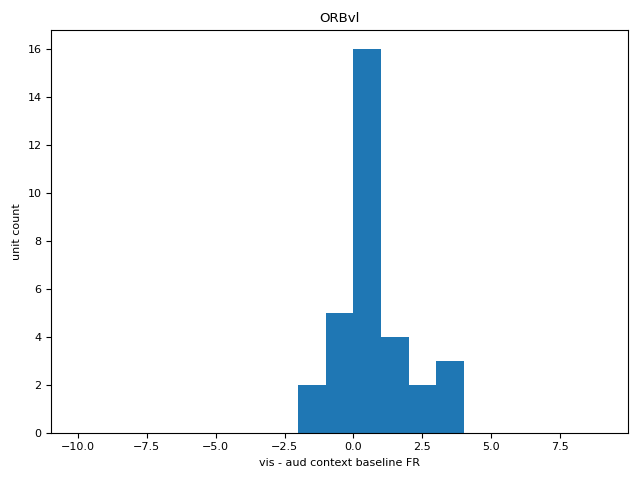

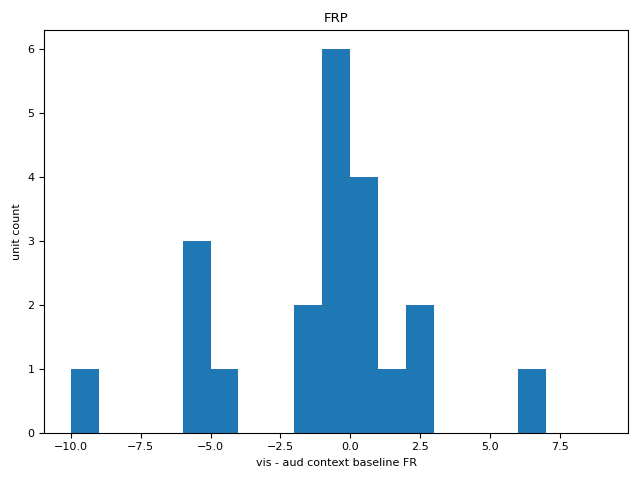

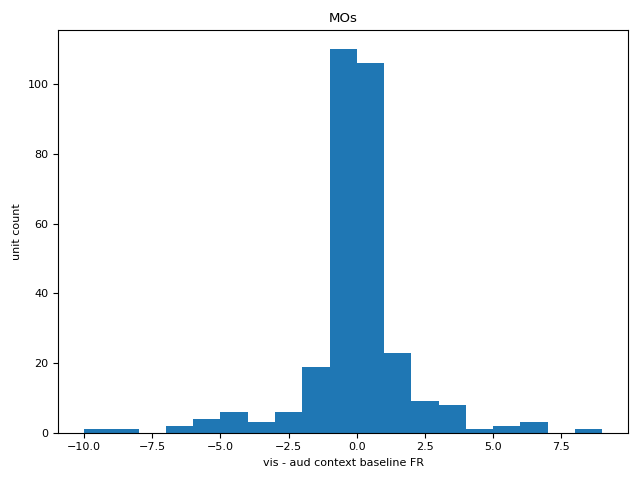

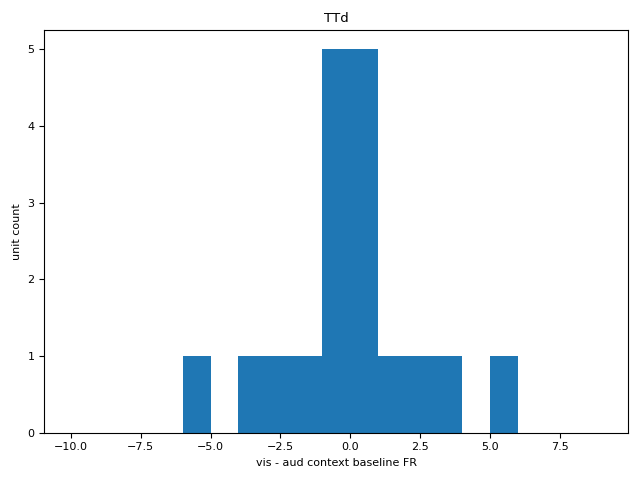

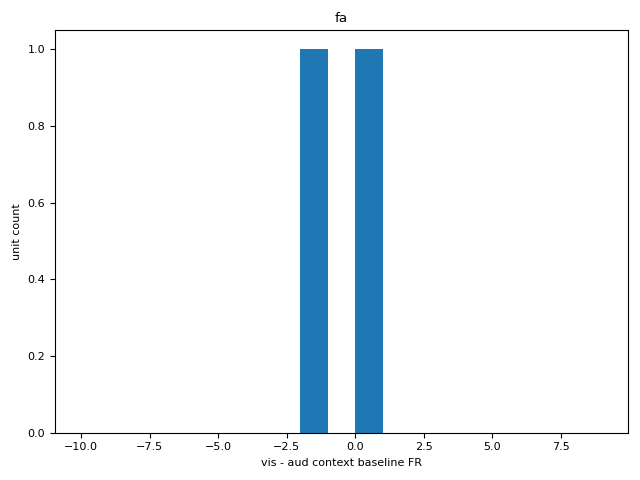

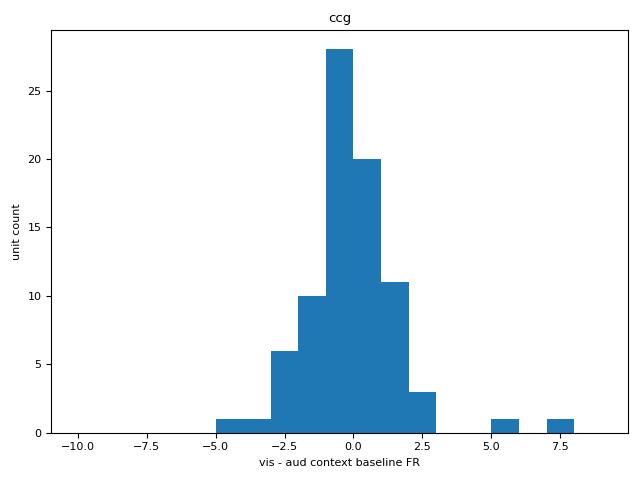

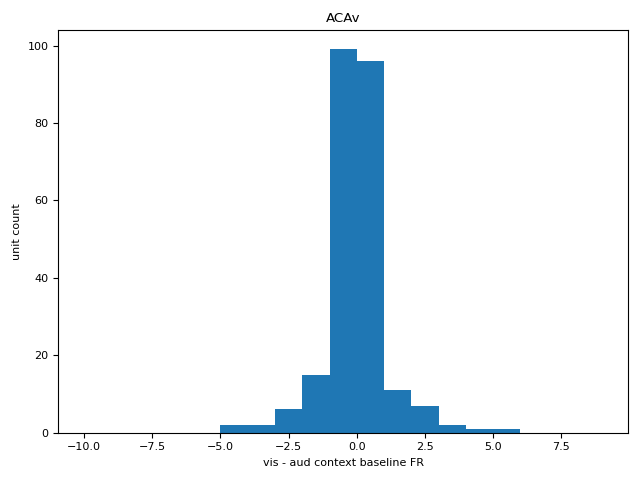

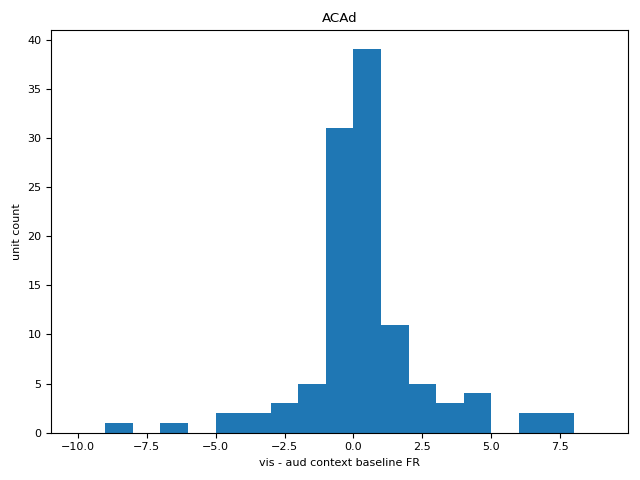

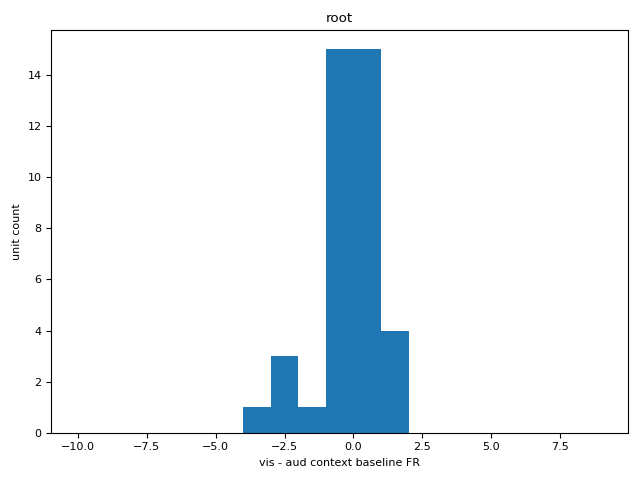

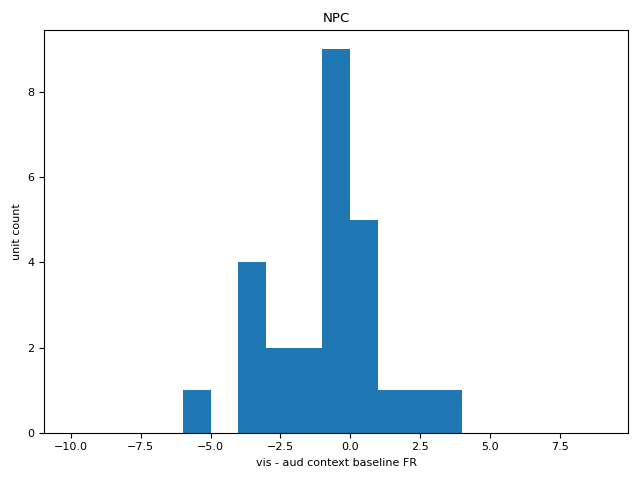

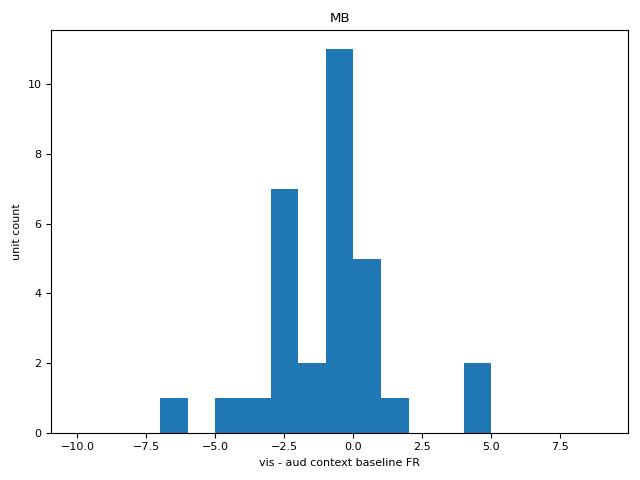

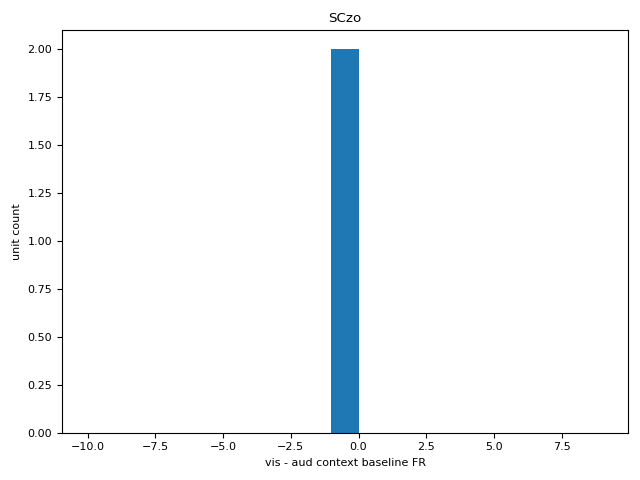

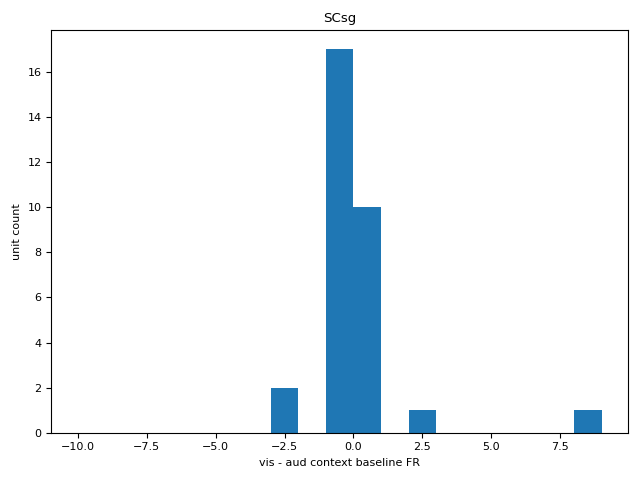

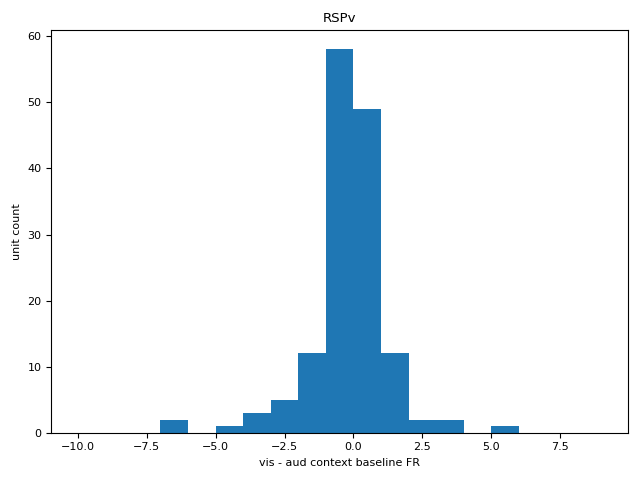

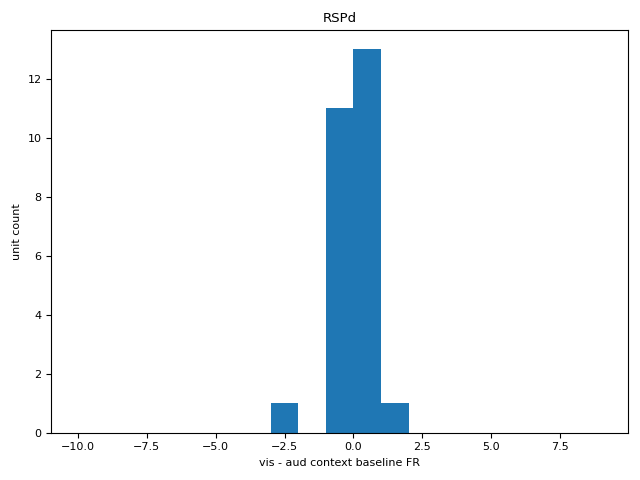

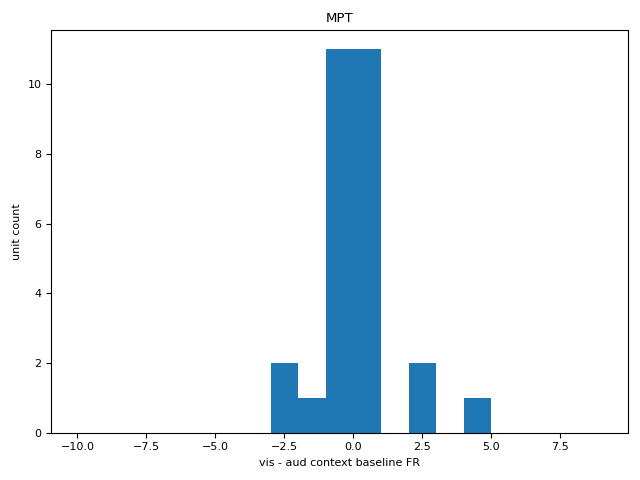

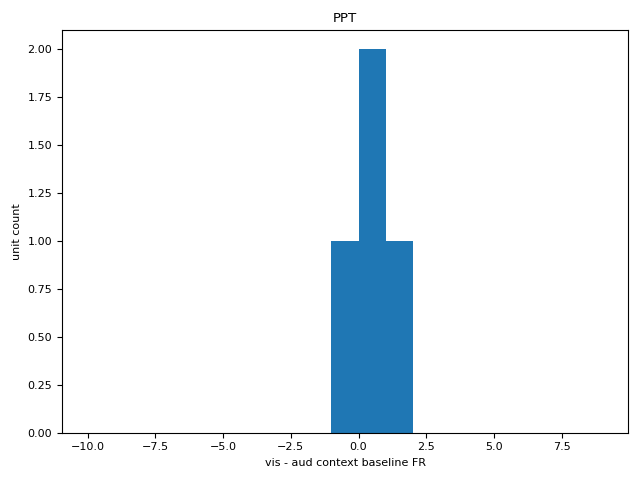

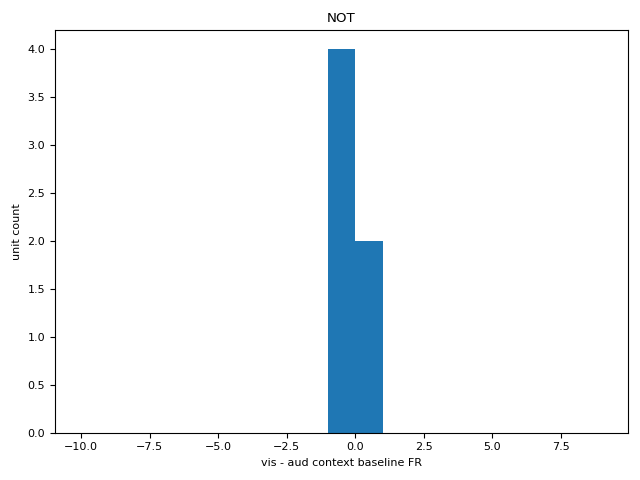

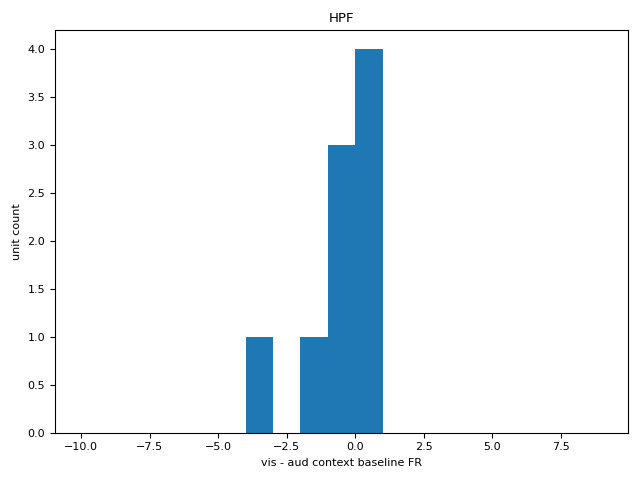

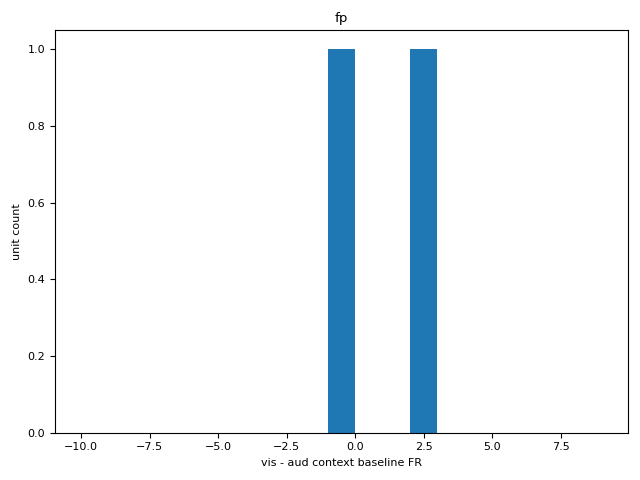

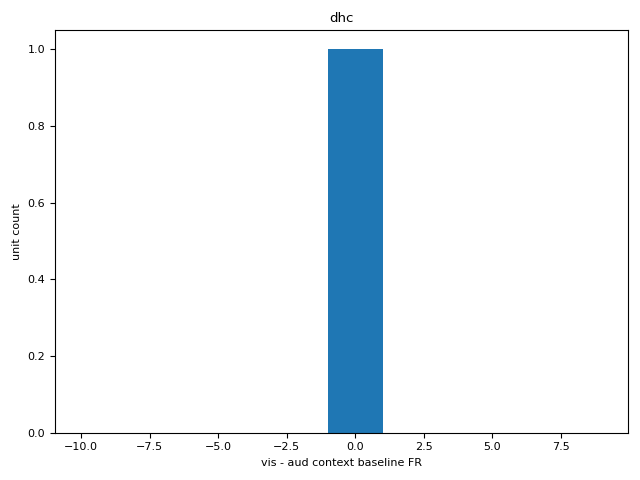

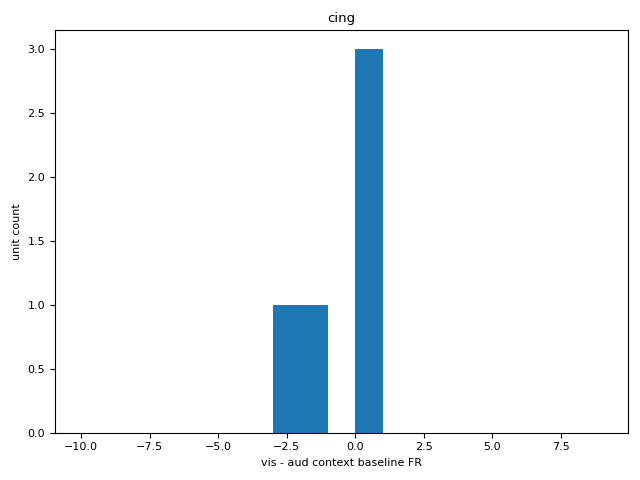

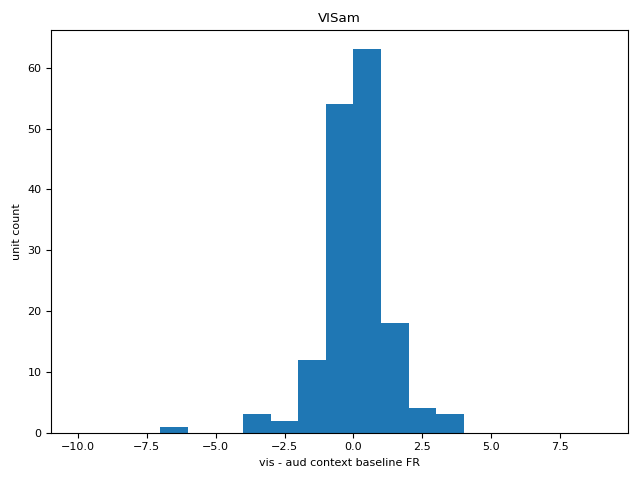

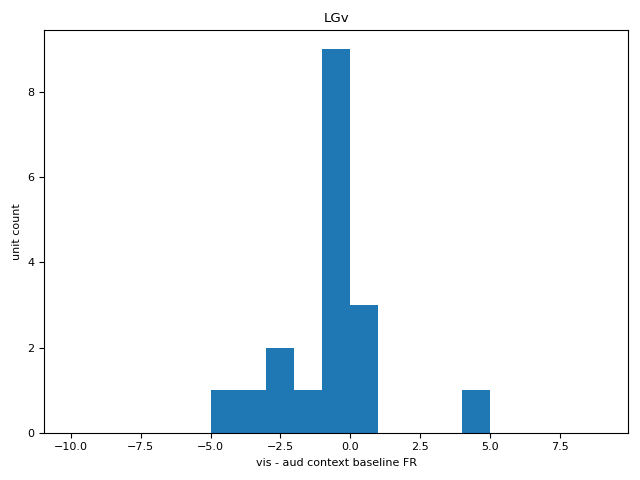

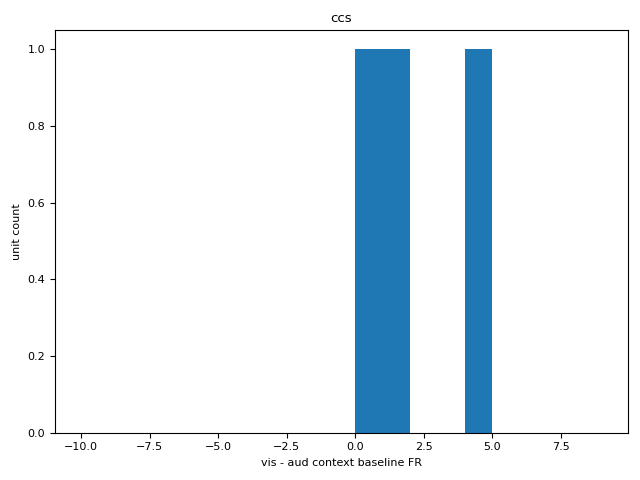

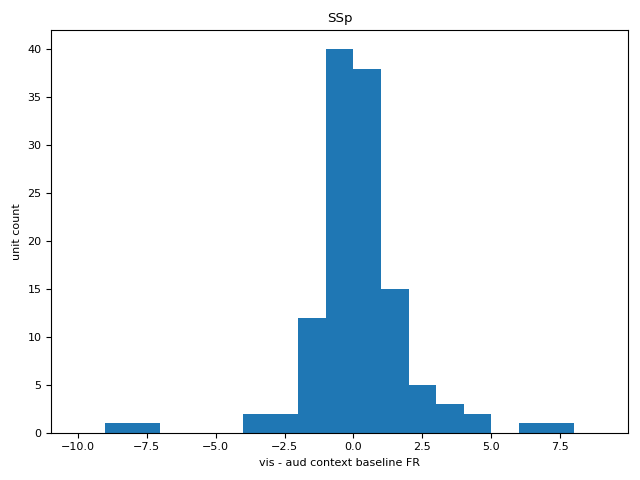

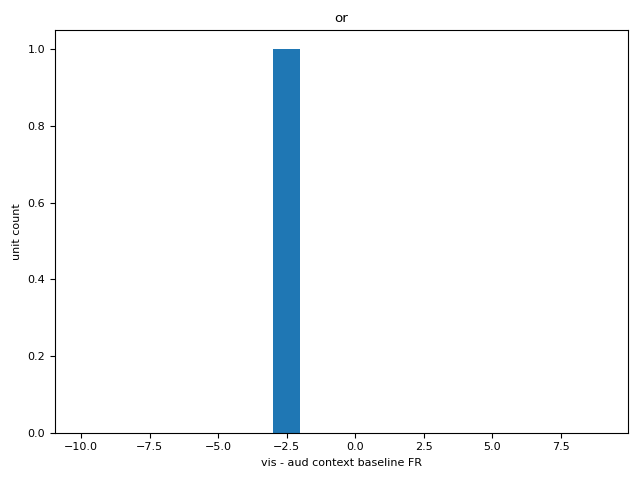

In [23]:
#plot distribution of vis vs. aud context fr differences for each area
xbins=np.arange(-10,10,1)

for area in session.units[:]['structure'].unique():

    fig,ax=plt.subplots(1,1)

    area_vis_vs_aud_diff = vis_vs_aud_diff[session.units[:].query('structure==@area').index.values]

    ax.hist(area_vis_vs_aud_diff, bins=xbins)
    ax.set_xlabel('vis - aud context baseline FR')
    ax.set_ylabel('unit count')
    ax.set_title(area)

    fig.tight_layout()

In [25]:
#plot trial-trial firing rate for chosen area, plus divide into RS and FS

sel_area='ACAd'

sel_RS_units=session.units[:].query('structure==@sel_area and peak_to_valley>0.0004')['unit_id'].values
RS_units_da=trial_da.sel(unit_id=sel_RS_units,time=slice(-0.5,0)).mean(dim=['time','unit_id'])

sel_FS_units=session.units[:].query('structure==@sel_area and peak_to_valley<=0.0004')['unit_id'].values
FS_units_da=trial_da.sel(unit_id=sel_FS_units,time=slice(-0.5,0)).mean(dim=['time','unit_id'])

In [ ]:
# session.units[:].query('structure==@sel_area and peak_to_valley>0.0004').index

In [ ]:
session.trials[:].query('is_context_switch').index.values

Text(0.5, 1.0, 'ACAd FS units')

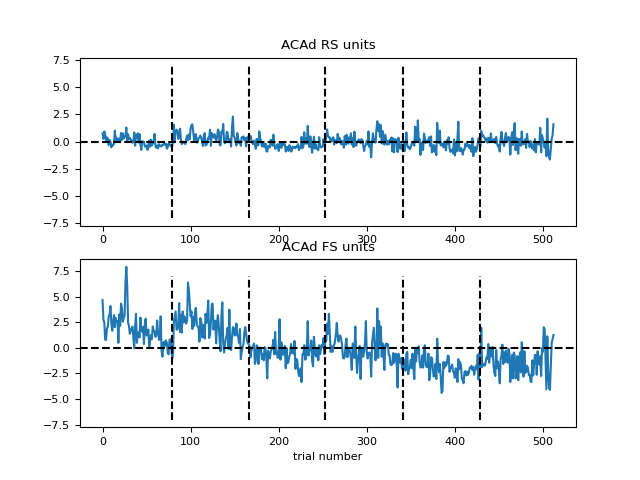

In [26]:
fig,ax=plt.subplots(2,1)
ax[0].plot(RS_units_da.trials, RS_units_da.values-RS_units_da.mean().values, label='RS')
ax[0].vlines(session.trials[:].query('is_context_switch').index.values,-7,7,color='k',linestyle='--')
ax[0].axhline(0,color='k',linestyle='--')
ax[0].set_title(sel_area+' RS units')

ax[1].plot(FS_units_da.trials, FS_units_da.values-FS_units_da.mean().values, label='FS')
ax[1].vlines(session.trials[:].query('is_context_switch').index.values,-7,7,color='k',linestyle='--')
ax[1].axhline(0,color='k',linestyle='--')
ax[1].set_xlabel('trial number')
ax[1].set_title(sel_area+' FS units')

In [ ]:
RS_units_da.sel(trials=slice(0,100)).mean().values